## Practical HomeWork N°1 AI

### Solved by Felipe Saldias 

[Activity's statement](https://docs.google.com/document/d/1-oZrexNbKHGwV239iYcXHLaKSXkjtgPddWKaLA2FMu0/edit) 

In [1]:
#import  necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



##seeting seaborn styles
sns.set()

##seeting some readability settings for pandas
pd.set_option("display.precision", 3)
pd.set_option("display.max_rows", 25)

In [2]:
%ls

Practico_1_AI_Felipe_Saldias.ipynb  SDSS-DR14.csv


In [3]:
#importamos el dataset


df_original = pd.read_csv("SDSS-DR14.csv")
df= df_original
print("Valores NaN en el data set?:  ", df.isnull().values.any())

#display(df[:10])
#df.groupby("rerun").describe()

df.describe()


Valores NaN en el data set?:   False


objid         ra        dec          u          g          r  \
count  1.000e+04  10000.000  10000.000  10000.000  10000.000  10000.000   
mean   1.238e+18    175.530     14.836     18.619     17.372     16.841   
std    0.000e+00     47.783     25.212      0.829      0.945      1.068   
min    1.238e+18      8.235     -5.383     12.989     12.800     12.432   
25%    1.238e+18    157.371     -0.539     18.178     16.815     16.173   
50%    1.238e+18    180.395      0.404     18.853     17.495     16.859   
75%    1.238e+18    201.547     35.649     19.259     18.010     17.513   
max    1.238e+18    260.884     68.542     19.600     19.919     24.802   

               i          z        run    rerun     camcol      field  \
count  10000.000  10000.000  10000.000  10000.0  10000.000  10000.000   
mean      16.584     16.423    981.035    301.0      3.649    302.380   
std        1.142      1.203    273.305      0.0      1.666    162.578   
min       11.947     11.610    308.000    301.0      1.000     11.000   
25%       15.854     15.618    752.000    301.0      2.000    184.000   
50%       16.555     16.390    756.000    301.0      4.000    299.000   
75%       17.259     17.141   1331.000    301.0      5.000    414.000   
max       28.180     22.833   1412.000    301.0      6.000    768.000   

       specobjid   redshift      plate        mjd    fiberid  
count  1.000e+04  1.000e+04  10000.000  10000.000  10000.000  
mean   1.645e+18  1.437e-01   1460.986  52943.533    353.069  
std    2.014e+18  3.888e-01   1788.778   1511.151    206.298  
min    2.996e+17 -4.136e-03    266.000  51578.000      1.000  
25%    3.389e+17  8.090e-05    301.000  51900.000    186.750  
50%    4.967e+17  4.259e-02    441.000  51997.000    351.000  
75%    2.881e+18  9.258e-02   2559.000  54468.000    510.000  
max    9.469e+18  5.354e+00   8410.000  57481.000   1000.000

In [4]:
#despues de analizar la descipcion entregada por la funcion describe() podemos percatarnos que las columnas objid 
#y rerun tienen el mismo valor para las todas las observaciones por lo que podemos prescindir de ellas
#sin mayor analisis


display(df.loc[:,"objid"].value_counts(),
        df.loc[:,"rerun"].value_counts())
#value_counts() is only aplicable in pd.Series to show wich are the differents values you can
#get in a series and how many times is each


df = df.drop(["objid",'rerun'], axis=1)

1.238e+18    10000
Name: objid, dtype: int64

301    10000
Name: rerun, dtype: int64

In [5]:
df.head(n=10000)

ra     dec       u       g       r       i       z   run  camcol  \
0     183.531   0.090  19.474  17.042  15.947  15.503  15.225   752       4   
1     183.598   0.135  18.663  17.214  16.676  16.489  16.392   752       4   
2     183.680   0.126  19.383  18.192  17.474  17.087  16.801   752       4   
3     183.871   0.050  17.765  16.603  16.161  15.982  15.904   752       4   
4     183.883   0.103  17.550  16.263  16.439  16.555  16.613   752       4   
...       ...     ...     ...     ...     ...     ...     ...   ...     ...   
9995  131.316  51.540  18.818  17.471  16.915  16.683  16.506  1345       3   
9996  131.306  51.671  18.273  17.438  17.077  16.717  16.699  1345       3   
9997  131.553  51.667  18.758  17.778  17.519  17.433  17.420  1345       3   
9998  131.477  51.753  18.883  17.911  17.532  17.363  17.140  1345       3   
9999  131.665  51.805  19.276  17.378  16.305  15.835  15.506  1345       3   

      field  specobjid   class   redshift  plate    mjd  fiberid  
0       267  3.722e+18    STAR -8.960e-06   3306  54922      491  
1       267  3.638e+17    STAR -5.490e-05    323  51615      541  
2       268  3.233e+17  GALAXY  1.231e-01    287  52023      513  
3       269  3.722e+18    STAR -1.106e-04   3306  54922      510  
4       269  3.722e+18    STAR  5.904e-04   3306  54922      512  
...     ...        ...     ...        ...    ...    ...      ...  
9995    161  5.033e+17  GALAXY  2.758e-02    447  51877      246  
9996    162  5.033e+17  GALAXY  1.178e-01    447  51877      228  
9997    162  8.223e+18    STAR -4.016e-04   7303  57013      622  
9998    163  5.033e+17  GALAXY  1.402e-02    447  51877      229  
9999    163  5.033e+17  GALAXY  1.184e-01    447  51877      233  

[10000 rows x 16 columns]

ra        dec          u          g          r          i  \
ra         2.283e+03  4.332e+00  1.237e+00  1.984e+00  2.403e+00  2.495e+00   
dec        4.332e+00  6.357e+02  7.371e-01  1.475e+00  1.707e+00  1.678e+00   
u          1.237e+00  7.371e-01  6.867e-01  6.653e-01  6.126e-01  5.702e-01   
g          1.984e+00  1.475e+00  6.653e-01  8.939e-01  9.672e-01  9.796e-01   
r          2.403e+00  1.707e+00  6.126e-01  9.672e-01  1.140e+00  1.192e+00   
i          2.495e+00  1.678e+00  5.702e-01  9.796e-01  1.192e+00  1.304e+00   
z          2.469e+00  1.725e+00  5.498e-01  1.001e+00  1.245e+00  1.348e+00   
run       -1.211e+03  5.364e+03  8.658e+00  1.510e+01  1.671e+01  1.553e+01   
camcol    -5.011e-01  4.815e+00  1.373e-02  1.610e-02  1.912e-02  2.561e-02   
field      4.620e+03 -5.389e+02  1.152e+00  2.252e+00  2.974e+00  3.672e+00   
specobjid -9.174e+18  4.486e+18 -2.160e+17 -1.047e+17  4.255e+16  1.678e+17   
redshift   5.630e-01  6.569e-01  5.275e-02  1.498e-01  1.831e-01  1.915e-01   
plate     -8.148e+03  3.984e+03 -1.919e+02 -9.298e+01  3.779e+01  1.490e+02   
mjd       -6.274e+03  2.520e+03 -2.114e+02 -1.325e+02 -1.508e+01  8.782e+01   
fiberid    5.667e+02  8.063e+02  1.932e+00  9.204e+00  1.345e+01  1.648e+01   

                   z        run     camcol      field  specobjid   redshift  \
ra         2.469e+00 -1.211e+03 -5.011e-01  4.620e+03 -9.174e+18  5.630e-01   
dec        1.725e+00  5.364e+03  4.815e+00 -5.389e+02  4.486e+18  6.569e-01   
u          5.498e-01  8.658e+00  1.373e-02  1.152e+00 -2.160e+17  5.275e-02   
g          1.001e+00  1.510e+01  1.610e-02  2.252e+00 -1.047e+17  1.498e-01   
r          1.245e+00  1.671e+01  1.912e-02  2.974e+00  4.255e+16  1.831e-01   
i          1.348e+00  1.553e+01  2.561e-02  3.672e+00  1.678e+17  1.915e-01   
z          1.448e+00  1.587e+01  2.191e-02  3.570e+00  2.724e+17  1.983e-01   
run        1.587e+01  7.470e+04  6.913e+01 -2.061e+04  5.152e+19  6.275e+00   
camcol     2.191e-02  6.913e+01  2.776e+00 -1.840e+01  1.369e+17  4.427e-03   
field      3.570e+00 -2.061e+04 -1.840e+01  2.643e+04 -3.069e+19  9.742e-01   
specobjid  2.724e+17  5.152e+19  1.369e+17 -3.069e+19  4.056e+36 -2.982e+16   
redshift   1.983e-01  6.275e+00  4.427e-03  9.742e-01 -2.982e+16  1.511e-01   
plate      2.419e+02  4.576e+04  1.216e+02 -2.726e+04  3.603e+21 -2.649e+01   
mjd        1.739e+02  2.906e+04  6.618e+01 -2.127e+04  2.943e+21 -3.405e+01   
fiberid    1.687e+01  7.813e+03  1.841e+02 -1.358e+03  9.549e+19  3.732e+00   

               plate        mjd    fiberid  
ra        -8.148e+03 -6.274e+03  5.667e+02  
dec        3.984e+03  2.520e+03  8.063e+02  
u         -1.919e+02 -2.114e+02  1.932e+00  
g         -9.298e+01 -1.325e+02  9.204e+00  
r          3.779e+01 -1.508e+01  1.345e+01  
i          1.490e+02  8.782e+01  1.648e+01  
z          2.419e+02  1.739e+02  1.687e+01  
run        4.576e+04  2.906e+04  7.813e+03  
camcol     1.216e+02  6.618e+01  1.841e+02  
field     -2.726e+04 -2.127e+04 -1.358e+03  
specobjid  3.603e+21  2.943e+21  9.549e+19  
redshift  -2.649e+01 -3.405e+01  3.732e+00  
plate      3.200e+06  2.614e+06  8.481e+04  
mjd        2.614e+06  2.284e+06  5.933e+04  
fiberid    8.481e+04  5.933e+04  4.256e+04

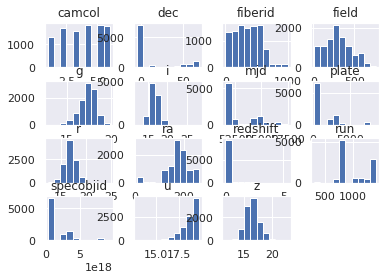

In [43]:
df.hist()
df.cov()

In [184]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
#X, y = load_digits(return_X_y=True)
print(X_features.shape)
Y_labels

X_new = SelectKBest(chi2, k=10).fit_transform(X_features, Y_labels)
X_new.shape


(10000, 15)


ValueError: Input X must be non-negative.

## 2. Ahora que eliminamos las columnas que no aportan informacion nos concentraremos en analizar los datos por clases



In [6]:
df.loc[:,"class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

aqui se visualiza que claramente la clase QSO que cuenta con menos ejemplos que las otras

In [7]:
#vemos los estadisticos de la informacion agrupada por clase
#df.dtypes
agrupados=df.groupby(['class']).describe()
agrupados

ra                                                              \
         count     mean     std    min      25%      50%      75%      max   
class                                                                        
GALAXY  4998.0  177.334  46.777  8.291  155.542  178.235  204.607  260.560   
QSO      850.0  177.468  47.101  9.839  155.494  181.134  206.302  258.868   
STAR    4152.0  172.962  48.999  8.235  161.106  182.281  199.206  260.884   

           dec          ...      mjd          fiberid                         \
         count    mean  ...      75%      max   count     mean      std  min   
class                   ...                                                    
GALAXY  4998.0  15.764  ...  51999.0  56799.0  4998.0  340.109  186.853  1.0   
QSO      850.0  20.571  ...  52366.5  57391.0   850.0  381.559  211.083  5.0   
STAR    4152.0  12.545  ...  54891.0  57481.0  4152.0  362.838  225.633  1.0   

                                       
           25%    50%     75%     max  
class                                  
GALAXY  186.25  345.0  496.00   994.0  
QSO     215.00  386.5  532.00   980.0  
STAR    179.00  351.0  526.25  1000.0  

[3 rows x 120 columns]

In [6]:
#display(df.columns,
#        df.index,
#        agrupados.columns,
#        agrupados.index)
#agrupados[('ra','mean')]#['GALAXY']

In [8]:
df

ra     dec       u       g       r       i       z   run  camcol  \
0     183.531   0.090  19.474  17.042  15.947  15.503  15.225   752       4   
1     183.598   0.135  18.663  17.214  16.676  16.489  16.392   752       4   
2     183.680   0.126  19.383  18.192  17.474  17.087  16.801   752       4   
3     183.871   0.050  17.765  16.603  16.161  15.982  15.904   752       4   
4     183.883   0.103  17.550  16.263  16.439  16.555  16.613   752       4   
...       ...     ...     ...     ...     ...     ...     ...   ...     ...   
9995  131.316  51.540  18.818  17.471  16.915  16.683  16.506  1345       3   
9996  131.306  51.671  18.273  17.438  17.077  16.717  16.699  1345       3   
9997  131.553  51.667  18.758  17.778  17.519  17.433  17.420  1345       3   
9998  131.477  51.753  18.883  17.911  17.532  17.363  17.140  1345       3   
9999  131.665  51.805  19.276  17.378  16.305  15.835  15.506  1345       3   

      field  specobjid   class   redshift  plate    mjd  fiberid  
0       267  3.722e+18    STAR -8.960e-06   3306  54922      491  
1       267  3.638e+17    STAR -5.490e-05    323  51615      541  
2       268  3.233e+17  GALAXY  1.231e-01    287  52023      513  
3       269  3.722e+18    STAR -1.106e-04   3306  54922      510  
4       269  3.722e+18    STAR  5.904e-04   3306  54922      512  
...     ...        ...     ...        ...    ...    ...      ...  
9995    161  5.033e+17  GALAXY  2.758e-02    447  51877      246  
9996    162  5.033e+17  GALAXY  1.178e-01    447  51877      228  
9997    162  8.223e+18    STAR -4.016e-04   7303  57013      622  
9998    163  5.033e+17  GALAXY  1.402e-02    447  51877      229  
9999    163  5.033e+17  GALAXY  1.184e-01    447  51877      233  

[10000 rows x 16 columns]

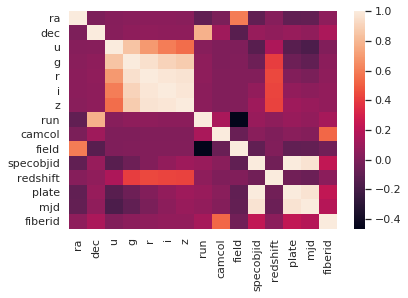

In [9]:
corr = df.corr()
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd90074b3a0>,
      dtype=object)

as


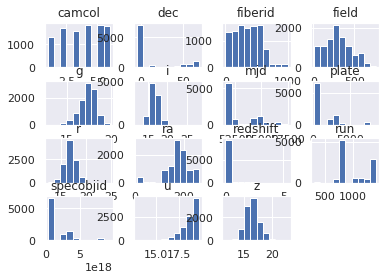

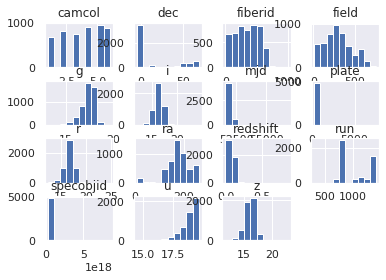

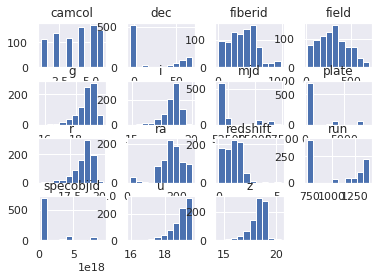

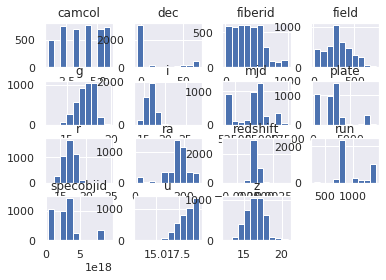

In [10]:
#Histograma para ver la distribucion de las variables 
display(df.hist())

#histograma por clases 
df.groupby(['class']).hist()
print("as")


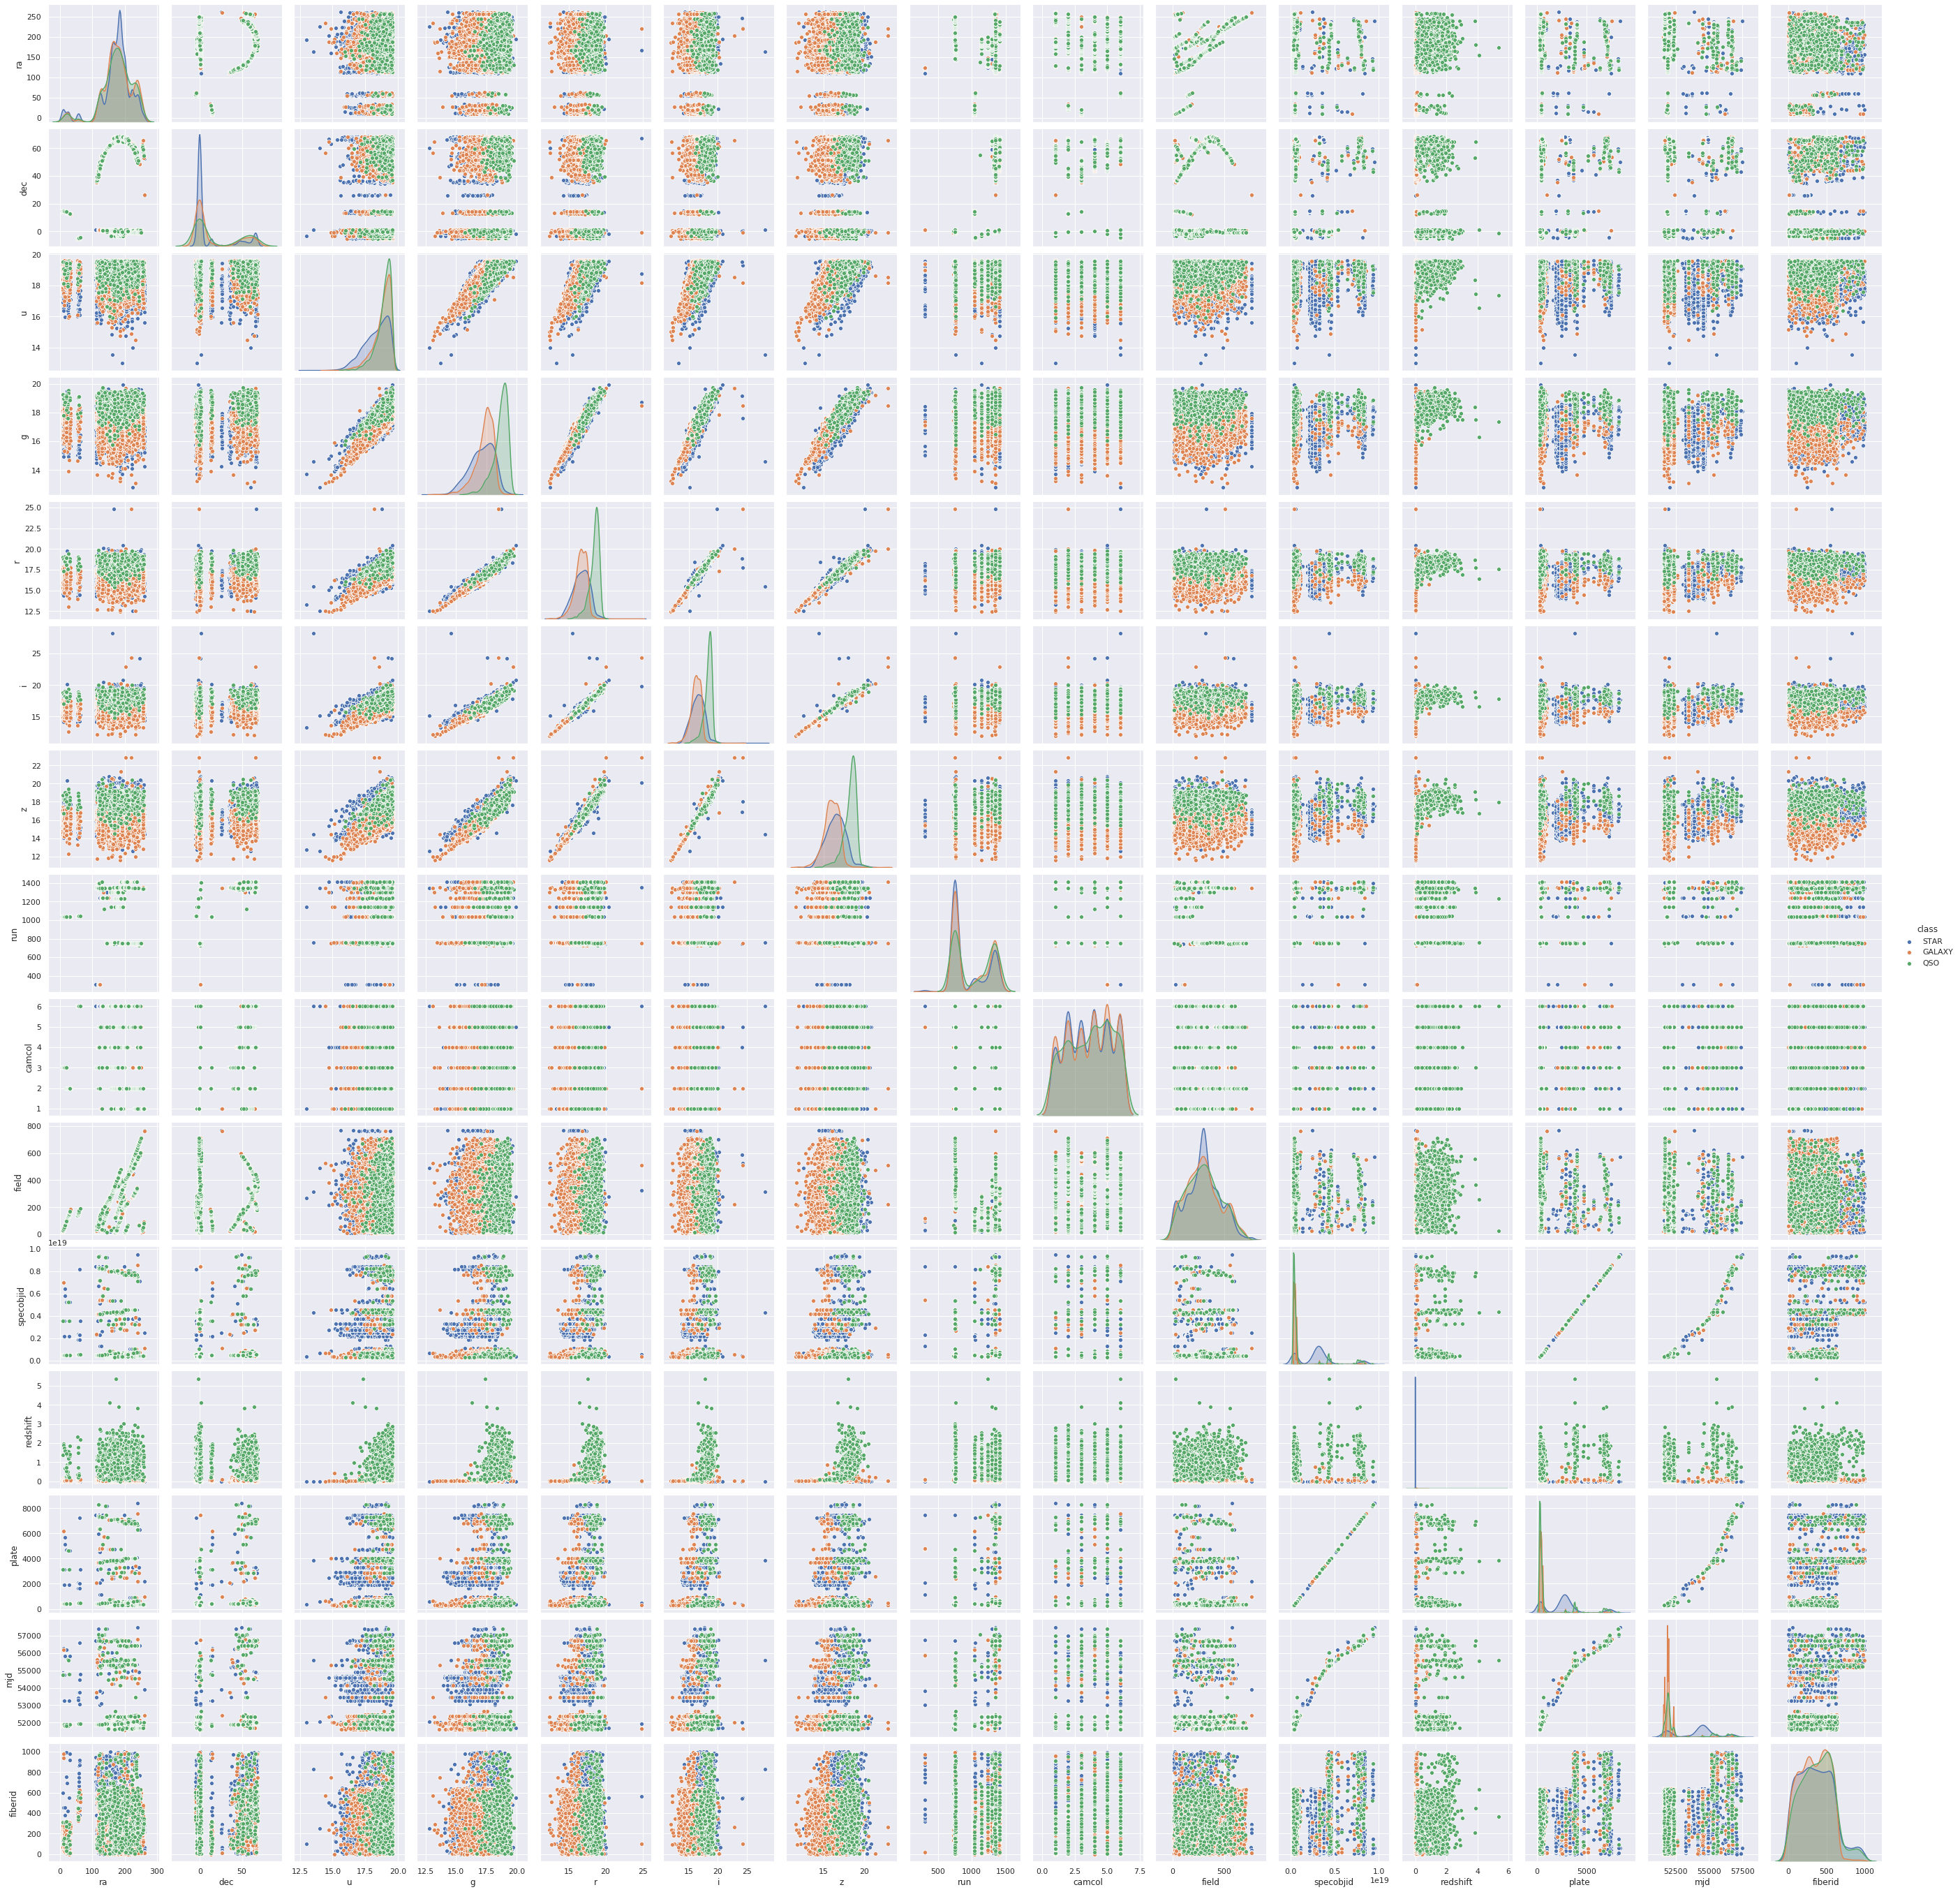

In [11]:
sns.pairplot(df, hue="class")

In [ ]:
#analizando la correlacion de las variables me dan ganas de eliminar el plate y el objid ya que 
#es muy sospechoso que esten tan relacionadas y me da la idea de que puede pertenecer a otra
#cosa mas asociada al equipo.

#TODO: probar el algoritmo eliminando estas shits

In [244]:
#Solo para visualizar una posible correlacion en las graficas de pares
from sklearn.preprocessing import LabelEncoder
df_naivi_encoded=df.copy()

LE = LabelEncoder()
df_naivi_encoded['class_naive_encoded'] = LE.fit_transform(df_naivi_encoded['class'])
df_naivi_encoded[['class','class_naive_encoded']]

class  class_naive_encoded
0       STAR                    2
1       STAR                    2
2     GALAXY                    0
3       STAR                    2
4       STAR                    2
...      ...                  ...
9995  GALAXY                    0
9996  GALAXY                    0
9997    STAR                    2
9998  GALAXY                    0
9999  GALAXY                    0

[10000 rows x 2 columns]

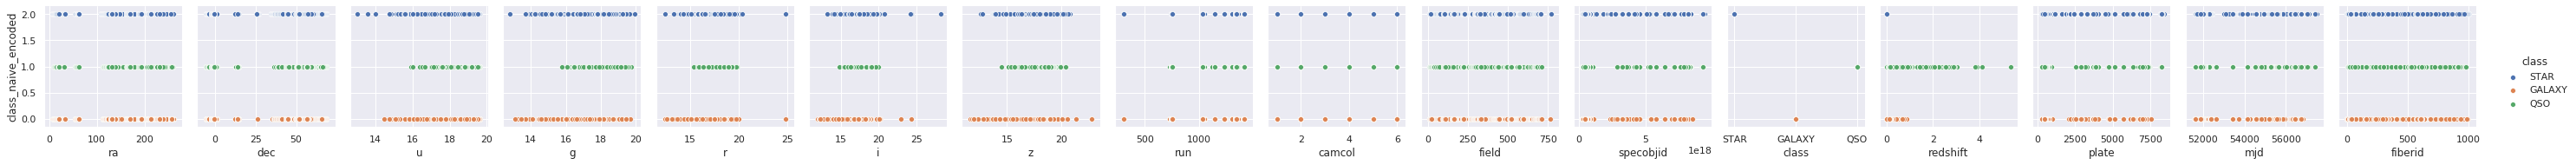

In [33]:
features_to_compare = df_naivi_encoded.columns.drop('class_naive_encoded','class')
pp = sns.pairplot(data=df_naivi_encoded,
                  x_vars=features_to_compare,
                  y_vars=['class_naive_encoded'],
                  hue="class")

In [104]:
#despues de mirar los gráficos de arriba es posible obtener deducciones del tipo: si el red shift es mayor a 2, 
#la observacion siempre sera un QSO, o para que sea STAR es necesario que su redshift sea muy muy bajo, de hecho si
#tuviera que aventurarme encuentro el redshift un buen candidato para ir clasificando en un arbol de descision

## 3. Ahora que terminamos de analizar la data la dividiremos y luego manejaremos el problema del desbalance de las clases

In [114]:
#from sklearn.preprocesing import StandardScaler
from sklearn.model_selection import train_test_split
test_size=0.3
seed=39

Y_labels=df.loc[:,'class']#['class']
X_features=df.drop(["class"], axis=1, inplace= False)

X_train, X_test, y_train, y_test = train_test_split(
    X_features, Y_labels, test_size=test_size, random_state=seed)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8eef5cfd0>,
      dtype=object)

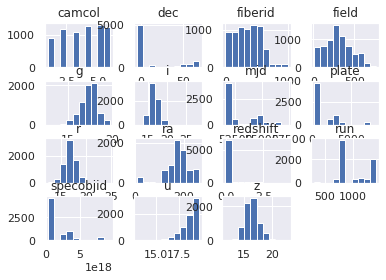

In [245]:
X_train.hist()

In [115]:
display(y_train.value_counts(),
        y_train.value_counts()/(10000*(1-test_size)),
        y_test.value_counts(),
        y_test.value_counts()/(10000*test_size))

GALAXY    3515
STAR      2892
QSO        593
Name: class, dtype: int64

GALAXY    0.502
STAR      0.413
QSO       0.085
Name: class, dtype: float64

GALAXY    1483
STAR      1260
QSO        257
Name: class, dtype: int64

GALAXY    0.494
STAR      0.420
QSO       0.086
Name: class, dtype: float64

In [ ]:
#se pueden ver bastante equilibrados ambos data sets con la semilla 39

In [96]:
#X_train.sort_index()

### Para manejar el problema del desbalance de las clases tenemos varias opciones de UNDERSAMPLING

[imbalanced learn undersampling docs](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html)

en esta oportunidad decidi utilizar undersampling para tratar el tema del desbalance ya que me parece un poco extraño generar un cuerpo celeste y sus caracteristica por mas estadistico que sea el mecanismo para generarlo, por lo que exploraremos

In [84]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_resampled, y_resampled = oss.fit_resample(X_features, Y_labels)
#print(sorted(Counter(y_resampled).items()))


In [129]:
#X_train.sort_index()
X_train.sort_values(by=['ra'])

ra     dec       u       g       r       i       z   run  camcol  \
3711    8.235  14.704  17.262  16.063  15.515  15.291  15.163  1035       3   
3713    8.246  14.754  19.345  18.111  17.455  17.204  17.053  1035       3   
3714    8.291  14.745  19.397  17.577  16.649  16.192  15.852  1035       3   
3718    8.738  14.721  18.071  16.753  16.168  15.866  15.753  1035       3   
3721    8.835  14.554  17.700  16.045  15.354  15.092  14.972  1035       3   
...       ...     ...     ...     ...     ...     ...     ...   ...     ...   
5421  260.682  26.187  16.988  15.758  15.732  15.739  15.789  1345       1   
5426  260.699  25.982  18.038  16.584  15.963  15.694  15.550  1345       1   
9526  260.759  25.891  18.441  17.010  16.485  16.278  16.189  1345       1   
9527  260.811  25.901  15.619  14.272  14.271  14.351  14.418  1345       1   
9528  260.851  25.840  17.958  16.761  16.238  16.008  15.873  1345       1   

      field  specobjid   redshift  plate    mjd  fiberid  
3711     18  3.601e+18 -8.077e-04   3198  54865      191  
3713     19  3.528e+18 -7.468e-04   3133  54789      225  
3714     19  4.707e+17  6.687e-02    418  51817      311  
3718     22  3.527e+18 -7.883e-04   3133  54789      167  
3721     22  3.527e+18 -3.675e-04   3133  54789      161  
...     ...        ...        ...    ...    ...      ...  
5421    766  1.102e+18 -4.134e-04    979  52427       18  
5426    767  2.457e+18 -4.178e-04   2182  53905      259  
9526    767  2.457e+18 -8.340e-05   2182  53905      246  
9527    768  2.457e+18  7.090e-05   2182  53905      244  
9528    768  2.457e+18 -9.396e-04   2182  53905      204  

[7000 rows x 15 columns]

In [166]:
X_resampled.sort_values(by=['ra'])

ra     dec       u       g       r       i       z   run  camcol  \
4743    8.235  14.704  17.262  16.063  15.515  15.291  15.163  1035       3   
4792    8.246  14.754  19.345  18.111  17.455  17.204  17.053  1035       3   
2098    8.291  14.745  19.397  17.577  16.649  16.192  15.852  1035       3   
4952    8.738  14.721  18.071  16.753  16.168  15.866  15.753  1035       3   
3580    8.835  14.554  17.700  16.045  15.354  15.092  14.972  1035       3   
...       ...     ...     ...     ...     ...     ...     ...   ...     ...   
5638  260.682  26.187  16.988  15.758  15.732  15.739  15.789  1345       1   
4303  260.699  25.982  18.038  16.584  15.963  15.694  15.550  1345       1   
4981  260.759  25.891  18.441  17.010  16.485  16.278  16.189  1345       1   
4997  260.811  25.901  15.619  14.272  14.271  14.351  14.418  1345       1   
4266  260.851  25.840  17.958  16.761  16.238  16.008  15.873  1345       1   

      field  specobjid   redshift  plate    mjd  fiberid  
4743     18  3.601e+18 -8.077e-04   3198  54865      191  
4792     19  3.528e+18 -7.468e-04   3133  54789      225  
2098     19  4.707e+17  6.687e-02    418  51817      311  
4952     22  3.527e+18 -7.883e-04   3133  54789      167  
3580     22  3.527e+18 -3.675e-04   3133  54789      161  
...     ...        ...        ...    ...    ...      ...  
5638    766  1.102e+18 -4.134e-04    979  52427       18  
4303    767  2.457e+18 -4.178e-04   2182  53905      259  
4981    767  2.457e+18 -8.340e-05   2182  53905      246  
4997    768  2.457e+18  7.090e-05   2182  53905      244  
4266    768  2.457e+18 -9.396e-04   2182  53905      204  

[5980 rows x 15 columns]

In [170]:
X_resampled.sort_values(by=['ra'])

ra     dec       u       g       r       i       z   run  camcol  \
4743    8.235  14.704  17.262  16.063  15.515  15.291  15.163  1035       3   
4792    8.246  14.754  19.345  18.111  17.455  17.204  17.053  1035       3   
2098    8.291  14.745  19.397  17.577  16.649  16.192  15.852  1035       3   
4952    8.738  14.721  18.071  16.753  16.168  15.866  15.753  1035       3   
3580    8.835  14.554  17.700  16.045  15.354  15.092  14.972  1035       3   
...       ...     ...     ...     ...     ...     ...     ...   ...     ...   
5638  260.682  26.187  16.988  15.758  15.732  15.739  15.789  1345       1   
4303  260.699  25.982  18.038  16.584  15.963  15.694  15.550  1345       1   
4981  260.759  25.891  18.441  17.010  16.485  16.278  16.189  1345       1   
4997  260.811  25.901  15.619  14.272  14.271  14.351  14.418  1345       1   
4266  260.851  25.840  17.958  16.761  16.238  16.008  15.873  1345       1   

      field  specobjid   redshift  plate    mjd  fiberid  
4743     18  3.601e+18 -8.077e-04   3198  54865      191  
4792     19  3.528e+18 -7.468e-04   3133  54789      225  
2098     19  4.707e+17  6.687e-02    418  51817      311  
4952     22  3.527e+18 -7.883e-04   3133  54789      167  
3580     22  3.527e+18 -3.675e-04   3133  54789      161  
...     ...        ...        ...    ...    ...      ...  
5638    766  1.102e+18 -4.134e-04    979  52427       18  
4303    767  2.457e+18 -4.178e-04   2182  53905      259  
4981    767  2.457e+18 -8.340e-05   2182  53905      246  
4997    768  2.457e+18  7.090e-05   2182  53905      244  
4266    768  2.457e+18 -9.396e-04   2182  53905      204  

[5980 rows x 15 columns]

In [173]:
y_resampled.value_counts()

GALAXY    961
QSO       593
STAR      512
Name: class, dtype: int64

In [201]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
#print(sorted(Counter(y_resampled).items()))

#deja la misma cantidad de ejemplos para cada uno 593 x 3 = 1779 rows, pero no conserva los valores originales
#si no que crea nuevos basados en una heuristica de clustercentroids


##### 3.2.1. Controlled under-sampling techniques

In [197]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

#deja la misma cantidad de ejemplos para cada uno 593 x 3 = 1779 rows, pero si conserva los valores originales



In [204]:
from imblearn.under_sampling import NearMiss  

nm1 = NearMiss(version=1)
X_resampled, y_resampled = nm1.fit_resample(X_train, y_train)



#deja la misma cantidad de ejemplos para cada uno 593 x 3 = 1779 rows, si conserva los valores originales y utiliza 
#algo diferente para seleccionar los valores a samplear, vale la pena compararlo, (min ra 11.365)

#MALO



In [207]:
from imblearn.under_sampling import NearMiss #2 
#a simple vista se ve que ajusta mejor, me gustaria compararlos 

nm1 = NearMiss(version=2)
X_resampled, y_resampled = nm1.fit_resample(X_train, y_train)

#deja la misma cantidad de ejemplos para cada uno 593 x 3 = 1779 rows, si conserva los valores originales y utiliza 


#MALO

In [213]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_train, y_train)

#deja 4259 ejemplo, basados en ENN, 2018 STARS, 1648 GALAXY y 593 QSO /// conserva los valores originales  




In [141]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours()
X_resampled, y_resampled = renn.fit_resample(X_train, y_train)

#deja 3839 ejemplo, basados en RENN, 1963 STARS, 2962 GALAXY y 593 QSO /// conserva los valores originales  



In [167]:
from imblearn.under_sampling import AllKNN

allknn = AllKNN()
X_resampled, y_resampled = allknn.fit_resample(X_train, y_train)
#deja 4382 ejemplo: 2014 STARS, 1775 GALAXY y 593 QSO /// conserva los valores originales  


##### 3.2.2.3. Condensed nearest neighbors and derived algorithms

In [172]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=0)
X_resampled, y_resampled = cnn.fit_resample(X_train, y_train)

#deja 2066 ejemplo: 512 STARS, 961 GALAXY y 593 QSO /// conserva los valores originales 
#rarisimo que deje menos estrellas que las qso, vale la pena compararlo

In [169]:
from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(random_state=0)
X_resampled, y_resampled = oss.fit_resample(X_train, y_train)

#deja 5980 ejemplo: 2425 STARS, 2962 GALAXY y 593 QSO /// conserva los valores originales 


## Una vez elegido el método para balancear el dataset de entrenamiento procedemos a entrenar los diferentes clasificadores, tenemos varios para elegir

[Clasificadores](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

### 1. KNeighborsClassifier
[Scikit-learn-Doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

[NearestNeighbors general](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

In [221]:
#ENTRENAMOS UN KNC con la totalidad de los valores, sin balancear el dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred= neigh.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1321   51  111]
 [ 182   18   57]
 [ 296   27  937]]
              precision    recall  f1-score   support

      GALAXY       0.73      0.89      0.80      1483
         QSO       0.19      0.07      0.10       257
        STAR       0.85      0.74      0.79      1260

    accuracy                           0.76      3000
   macro avg       0.59      0.57      0.57      3000
weighted avg       0.74      0.76      0.74      3000



In [223]:
#### ENTRENAMOS UN KNC con los valores undersampleados

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_resampled, y_resampled)

y_pred= neigh.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1090  355   38]
 [ 155   75   27]
 [ 207  177  876]]
              precision    recall  f1-score   support

      GALAXY       0.75      0.73      0.74      1483
         QSO       0.12      0.29      0.17       257
        STAR       0.93      0.70      0.80      1260

    accuracy                           0.68      3000
   macro avg       0.60      0.57      0.57      3000
weighted avg       0.77      0.68      0.72      3000



In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

y_pred= neigh.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 213 1260   10]
 [  34  206   17]
 [ 607  410  243]]
              precision    recall  f1-score   support

      GALAXY       0.25      0.14      0.18      1483
         QSO       0.11      0.80      0.19       257
        STAR       0.90      0.19      0.32      1260

    accuracy                           0.22      3000
   macro avg       0.42      0.38      0.23      3000
weighted avg       0.51      0.22      0.24      3000



### Árboles de decisión 
[Arbol como clasificador](https://scikit-learn.org/stable/modules/tree.html)

[Arboles en general documentacion](https://scikit-learn.org/stable/modules/tree.html)

In [228]:
#Vamos a entrenar un arbol de desicion con todos los datos, sin balancear

from sklearn import tree
from sklearn.metrics import classification_report


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1460   23    0]
 [  17  240    0]
 [   2    2 1256]]
              precision    recall  f1-score   support

      GALAXY       0.99      0.98      0.99      1483
         QSO       0.91      0.93      0.92       257
        STAR       1.00      1.00      1.00      1260

    accuracy                           0.99      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.99      0.99      0.99      3000



In [239]:
#Vamos a entrenar un arbol de desicion con todos los datos, sin balancear

from sklearn import tree
from sklearn.metrics import classification_report


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_resampled, y_resampled)

y_pred= clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1414   63    6]
 [  15  242    0]
 [ 150    2 1108]]
              precision    recall  f1-score   support

      GALAXY       0.90      0.95      0.92      1483
         QSO       0.79      0.94      0.86       257
        STAR       0.99      0.88      0.93      1260

    accuracy                           0.92      3000
   macro avg       0.89      0.92      0.91      3000
weighted avg       0.93      0.92      0.92      3000



### Random-Forest 
[Scikit-learn random-forest docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print(clf.predict(X_test))

y_pred= clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

['STAR' 'GALAXY' 'GALAXY' ... 'GALAXY' 'STAR' 'STAR']
[[1424   20   39]
 [  39  199   19]
 [ 104    0 1156]]
              precision    recall  f1-score   support

      GALAXY       0.91      0.96      0.93      1483
         QSO       0.91      0.77      0.84       257
        STAR       0.95      0.92      0.93      1260

    accuracy                           0.93      3000
   macro avg       0.92      0.88      0.90      3000
weighted avg       0.93      0.93      0.93      3000



In [236]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_resampled, y_resampled)
clf.predict((X_test))

array(['STAR', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'STAR', 'STAR'],
      dtype=object)

In [95]:
df.loc[:,"class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [90]:
df.loc[:,"class"].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [89]:
y_resampled.value_counts()

GALAXY    4223
STAR      3547
QSO        850
Name: class, dtype: int64

In [97]:
#X_resampled.sort_values(by=['ra'])